# Tugas Pemodelan Dan Simulasi
Judul : Simulasi Peluru Jatuh dan Memantul

Nama : Muhammad Fadhil Syahputra

NIM : 2211014210002

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
class Bullet():
    def __init__(self,  energy: float, mass: float, angle: float, gravity: float):
        self.energy = energy
        self.angle = angle
        self.mass = mass
        self.time_shift = 0
        self.gravity = gravity
        self.y_energy = self.getYEnergy()
        self.x_energy = self.getXEnergy()
        self.x_velocity = self.getXvelocity()
        self.eq = self.getEq()
        self.roots = self.getRoots()
        self.time = self.getTime()
        self.height = self.getHeight()
        self.long= self.getLong()

    def getYEnergy(self):
        y_energy = self.energy * np.sin(np.radians(self.angle))
        return y_energy
    
    def getXEnergy(self):
        x_energy = self.energy * np.cos(np.radians(self.angle))
        return x_energy
    
    def getXvelocity(self):
        x_velocity = np.sqrt(2 * self.x_energy / self.mass)
        return x_velocity

    def getEq(self):
        second_term = np.sqrt(2 * self.y_energy / self.mass)
        first_term = -self.gravity / 2
        coeff = [first_term, second_term, 0]
        return coeff
    
    def getRoots(self):
        coeff = self.eq
        roots = np.roots(coeff)
        real_roots = roots[roots.imag == 0].real
        real_roots = np.sort(real_roots)
        return real_roots
    
    def getTime(self):
        time = np.linspace(self.roots[0], self.roots[1], 100)
        return time
    
    def getHeight(self):
        coeff = self.eq

        height = np.polyval(coeff, self.time)
        return height
    
    def shiftTime(self, time_shift: float):
        self.time_shift = time_shift
        self.time = self.time + time_shift
        return self.time
    
    def updateRoots(self):
        self.roots = self.roots + self.time_shift

    def getLong(self):
        self.long = self.x_velocity*self.time
        return self.long
    
    def shiftLong(self, long_shift: float):
        self.long = self.long + long_shift
        return self.long
    
def getEnergyArr(energy: float, n: int, disipation: float):
    if n == 0:
        return [energy]
    else:
        return [energy] + getEnergyArr(energy * disipation, n - 1, disipation)
    



In [59]:
plot_titles = ['Heigh Vs Time', "Long Vs Time", 'Height Vs Long']

plot_labels = [ 
                    {
                        "x":'Time (s)',
                        "y" :'Height (m)' 
                    },

                    {
                        "x":'Time (s)',
                        "y" :'Long (m)' 
                    },

                    {
                        "x":'Long (m)',
                        "y" :'Height (m)' 
                    }
               ]


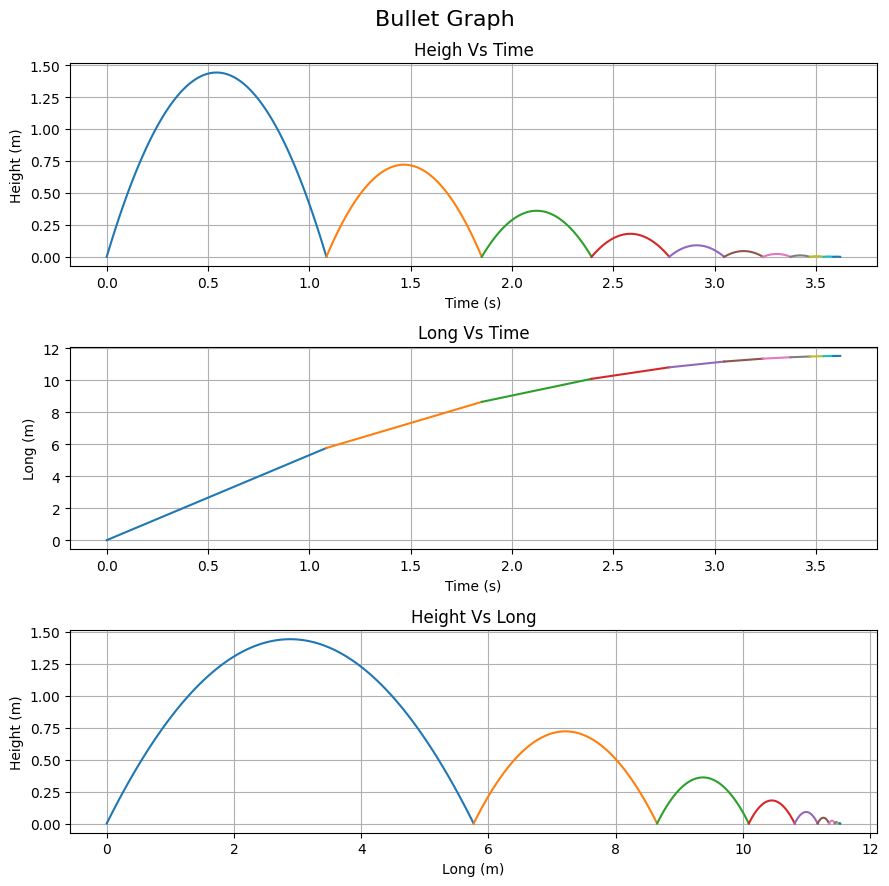

In [83]:

constants = {
    'g': 9.81,  # m/s^2
    'm': 0.5,   # kg
    'Disipation': 0.5,  # J/m
    'Energy' : 10,
    'iter' : 10,
    'angle' : 45,  # degrees
}
energys = getEnergyArr(constants['Energy'], constants['iter'], constants['Disipation'])
bullets = [Bullet(energy, constants['m'], constants['angle'], constants['g']) for energy in energys]
fig, axs = plt.subplots(3)
fig.set_size_inches(9,9)
fig.suptitle('Bullet Graph', fontsize=16)
for i, bullet in enumerate(bullets):
    if i == 0:
        axs[0].plot(bullet.time, bullet.height, label=f'Energy: {bullet.energy} J')
        axs[1].plot(bullet.time, bullet.long, label=f'Energy: {bullet.energy} J')
        axs[2].plot(bullet.long, bullet.height, label=f'Energy: {bullet.energy} J')
    else:
        bullet.shiftTime(bullets[i-1].roots[1])
        bullet.shiftLong(bullets[i-1].long[-1])
        bullet.updateRoots()
        axs[0].plot(bullet.time, bullet.height, label=f'Energy: {bullet.energy} J')
        axs[1].plot(bullet.time, bullet.long, label=f'Energy: {bullet.energy} J')
        axs[2].plot(bullet.long, bullet.height, label=f'Energy: {bullet.energy} J')
for ax, title, label in zip(axs, plot_titles, plot_labels):
    ax.set_title(title)
    ax.set_xlabel(label['x'])
    ax.set_ylabel(label['y'])
    ax.grid()

plt.tight_layout()
plt.show()